In [31]:
import pandas as pd 
import numpy as np 
from numpy import linspace
import seaborn as sns

import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [5]:
df = pd.read_csv("D:/ADSP/Hertfordshire-Constabulary/data/final-one-hot-encoded.csv")
df

,LSOA_code,crime_year__2019,crime_year__2020,crime_year__2021,crime_year__2022,crime_month__1,crime_month__2,crime_month__3,crime_month__4,crime_month__5,...,crime_type__Criminal damage and arson,crime_type__Drugs,crime_type__Other crime,crime_type__Possession of weapons,crime_type__Public order,crime_type__Robbery,crime_type__Vehicle crime,crime_type__Violence and sexual offences,crime_type__theft,outcome_type
0,891,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1059,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1165,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,866,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,937,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121355,891,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
121356,501,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
121357,483,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
121358,998,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
x_input = df.iloc[: , :-1]
x_input

,LSOA_code,crime_year__2019,crime_year__2020,crime_year__2021,crime_year__2022,crime_month__1,crime_month__2,crime_month__3,crime_month__4,crime_month__5,...,crime_type__Burglary,crime_type__Criminal damage and arson,crime_type__Drugs,crime_type__Other crime,crime_type__Possession of weapons,crime_type__Public order,crime_type__Robbery,crime_type__Vehicle crime,crime_type__Violence and sexual offences,crime_type__theft
0,891,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1059,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1165,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,866,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,937,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121355,891,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
121356,501,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
121357,483,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121358,998,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
y = df["outcome_type"]
y

0         1
1         0
2         1
3         0
4         0
         ..
121355    0
121356    0
121357    0
121358    0
121359    0
Name: outcome_type, Length: 121360, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4, stratify=y) 
# using stratify to ensure no class disparity

In [17]:
y_train.value_counts()

0    78430
1    18658
Name: outcome_type, dtype: int64

In [19]:
y_test.value_counts()

0    19608
1     4664
Name: outcome_type, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(x_train)
# apply transform
x_train = scaler.transform(x_train)
x_train

array([[0.6835443 , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75189873, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.8978903 , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.53670886, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.40759494, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.36202532, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
x_test = scaler.transform(x_test)

In [21]:
dct = DecisionTreeClassifier(criterion="entropy", max_depth=3, class_weight="balanced")
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

In [23]:
y_pred = dct.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[14141  5467]
 [ 2096  2568]]


In [25]:
from sklearn.model_selection import GridSearchCV
class_weight = np.linspace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}

gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 3)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.2789473684210526, 1: 0.7210526315789474}}


In [26]:
dct = DecisionTreeClassifier(criterion="gini", max_depth=3, 
class_weight={0: 0.2789473684210526, 1: 0.7210526315789474})
dct.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2789473684210526,
                                     1: 0.7210526315789474},
                       max_depth=3)

In [27]:
y_pred = dct.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[14268  5340]
 [ 2131  2533]]


In [28]:
f1_score(y_test, y_pred)

0.4040839116216

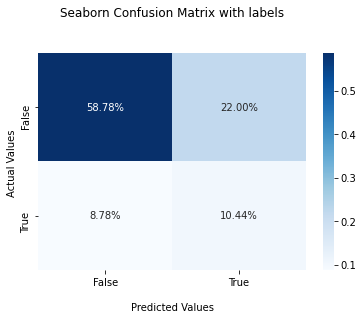

In [29]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     19608
           1       0.32      0.54      0.40      4664

    accuracy                           0.69     24272
   macro avg       0.60      0.64      0.60     24272
weighted avg       0.76      0.69      0.72     24272



In [32]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='saga', multi_class='auto'),
        'params': {
            'C': [1,5,10],
            "solver":["saga","lbfgs"]
        }
    },
    'naive_bayes_gaussian': {
        'model': CategoricalNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(max_depth=5),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.2, .3, .4],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [33]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, 
    scoring = "f1", return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_metrics